## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>


Let's take a look at the data, which consists of two files:

* **playstore_data.csv:** contains all the details of the applications on Google 
Play. There are 13 features that describe a given app.
* **user_reviews.csv:** contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.



## **Importing the required module and dataset from drive and read the csv file**

In [ ]:
# importing necessary libraries for future analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
playstore_data ='/content/drive/MyDrive/Copy of Play Store Data.csv'
userreview_data ='/content/drive/MyDrive/Copy of User Reviews.csv'
df_playstore_data=pd.read_csv(playstore_data)
df_user_review=pd.read_csv(userreview_data)

## **Basic Inspection of Dataset**

In [ ]:
#check the data set
ps_data=pd.concat([df_playstore_data.head(),df_playstore_data.tail()])
ps_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
df_playstore_data.shape

(10841, 13)

In [ ]:
df_playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df_user_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
df_playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**let's have a look at our dataset :-**



* App :- Name of the App
* Category :- Category under which the App falls.
* Rating :- Application's rating on playstore
* Reviews :- Number of reviews of the App.
* Size :- Size of the App.
* Install :- Number of Installs of the App
* Type :- Whether the App is free/paid
* Price :- Price of the app (0 if it is Free)
* Content Rating :- Appropriate Target Audience of the App.
* Genres:- Genre under which the App falls.
* Last Updated :- Date when the App was last updated
* Current Ver :- Current Version of the Application
* Android Ver :- Minimum Android Version required to run the App




In [ ]:
#lets us see the second dataframe too.
df_user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df_user_review['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

## **Data Cleaning**

**Data Cleaning and Handling the NaN values in the Data Set**


* We saw and also got the information about the dataset. Now we have to clean that attributes which have not to be useful.Data Cleaning is one of the most essential part of data analysis.
* We have to Replace all the Null values with the Average of their Columns or with not null values.

In [ ]:
df_playstore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


**The number of null values are:**

Rating has 1474 null values which contributes almost 14% of the data. Type and Content_Rating contributes 0.01% null values of the data. Current_Ver has 8 null values which contributes 0.07% of the data. Android_Ver contributes 0.03% null values of the data.

* Let's first deal with the columns which contains heigher number of NaN values.By going through the NaN values, we must come up with a way to replace them with non NaN values because it is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.
* We can replace the null values the aggregate (mean or median) of the remaining values in the Rating column.

In [ ]:
df_playstore_data["Rating"].fillna(df_playstore_data["Rating"].mean(),inplace=True)


In [ ]:
#we know that the rating of any app in the play store will be in between 1 and 5.
#Lets check whether there are any ratings out of this range and remove the rating wich is greater than 5.
ps=df_playstore_data[df_playstore_data['Rating']>5].index[0]
print(ps)
df_playstore_data=df_playstore_data.drop(10472)

10472


**Current Ver and Android Ver Null value**

There are total 8 NaN values in Current Ver and 2 NaN Android Ver 

In [ ]:
# The rows containing NaN values in the Current Ver column
ps_null=df_playstore_data[df_playstore_data["Current Ver"].isnull()]
ps_null

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.200000,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.193338,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.000000,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.193338,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.193338,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.193338,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
# Finding the different values the 'Current Ver' column takes
ps_count=df_playstore_data['Current Ver'].value_counts()
ps_count

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

In the Current Var Column there is no any particular value which replace the NAN values so we can replace it from dataframe due to less contribution. or we can replace it from it's last version.

In [ ]:
df_playstore_data["Current Ver"] = np.where(df_playstore_data['Current Ver'] == "NaN", df_playstore_data['Current Ver'], df_playstore_data['Android Ver'])
df_playstore_data[df_playstore_data["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",NaN,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",NaN,NaN


In [ ]:
#There is no any version of android sop we can drop these column
df_playstore_data=df_playstore_data[df_playstore_data['Current Ver'].notna()]
df_playstore_data.shape

(10838, 13)


**Type: There is only one NaN value in this column**

In [ ]:
df_playstore_data[df_playstore_data["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.193338,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
#In the above cell price is 0 so we can say that type is free
df_playstore_data.loc[9148,"Type"]='Free'

## **Handling duplicates values and Manipulating dataset:**

* **Changing the datatype of the Last Updated column from string to datetime**





In [ ]:
# Pandas to_datetime() function applied to the values in the last updated column helps for converting string Date time into Python Date time object.
df_playstore_data['Last Updated'] = pd.to_datetime(df_playstore_data['Last Updated'])
df_playstore_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,4.0.3 and up,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,4.0.3 and up,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,4.0.3 and up,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,4.2 and up,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,4.4 and up,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25,4.1 and up,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06,4.1 and up,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20,2.2 and up,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


* 

In [ ]:
def kb_to_mb_converter(value):
  if 'M' in value:
    return float(value[:-1])
  elif 'K' in value:
    return float(value[:-1]/1024)
  else:
    return 0 


df_playstore_data["Size"]=df_playstore_data["Size"].apply(lambda x: kb_to_mb_converter(x))
df_playstore_data['Size'] =df_playstore_data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

In [ ]:
# Definning a function to takes a string and replace the following characters if present, '+', ',' ,'$','NaN'
def func(num):
  if '+' in num:
    num = num.replace('+','')
  if ',' in num:
    num = num.replace(',','')
  if '$' in num:
    num = num.replace('$','')
  if 'NaN' in num:
    num = '0'
  else:
    pass
  return num

In [ ]:
#Changing the 'Installs' column values into valid numeric values
df_playstore_data['Installs'] = pd.to_numeric(df_playstore_data['Installs'].map(lambda x: func(x)))


#Changing the 'Price' column values into valid numeric values
df_playstore_data['Price'] = pd.to_numeric (df_playstore_data['Price'].map(lambda x:  func(x)))

#Changing the 'Reviews' column values into valid numeric values
df_playstore_data['Reviews'] = pd.to_numeric(df_playstore_data['Reviews'])
df_playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10838 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10838 non-null  object        
 1   Category        10838 non-null  object        
 2   Rating          10838 non-null  float64       
 3   Reviews         10838 non-null  int64         
 4   Size            10838 non-null  float64       
 5   Installs        10838 non-null  int64         
 6   Type            10838 non-null  object        
 7   Price           10838 non-null  float64       
 8   Content Rating  10838 non-null  object        
 9   Genres          10838 non-null  object        
 10  Last Updated    10838 non-null  datetime64[ns]
 11  Current Ver     10838 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.4+ MB


In [ ]:
df_playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,4.0.3 and up,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,4.0.3 and up,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,4.0.3 and up,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,4.2 and up,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,4.4 and up,4.4 and up


## Data exploration

### 7.Lets see the major Type of app distribution in playstore.

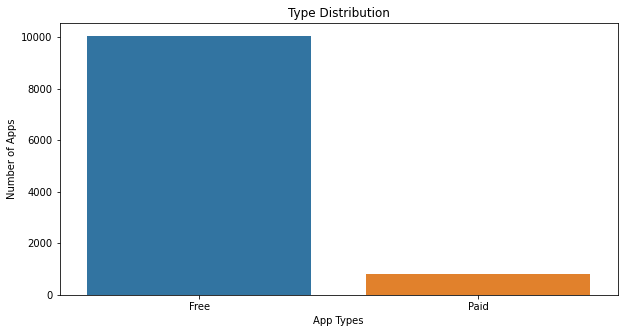

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(df_playstore_data['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.xlabel('App Types')
plt.show()

### 8.lets see the apps dependence on size and type and it effect on rating too.

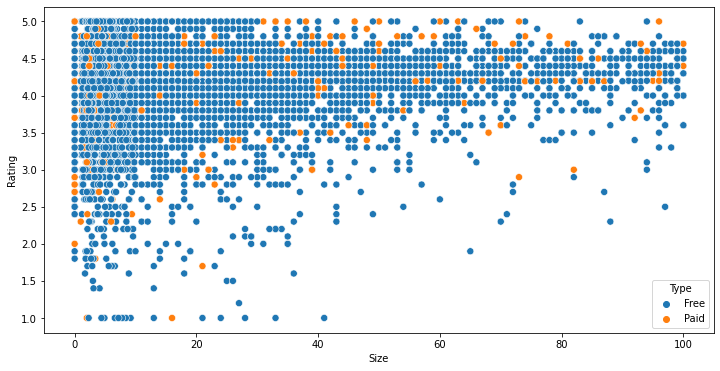

In [ ]:
# show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(12, 6))
sns.scatterplot(df_playstore_data['Size'],
               df_playstore_data['Rating'],
               hue=df_playstore_data['Type'],
               s=50)

### 9.Review sentiments in all the app dataset.

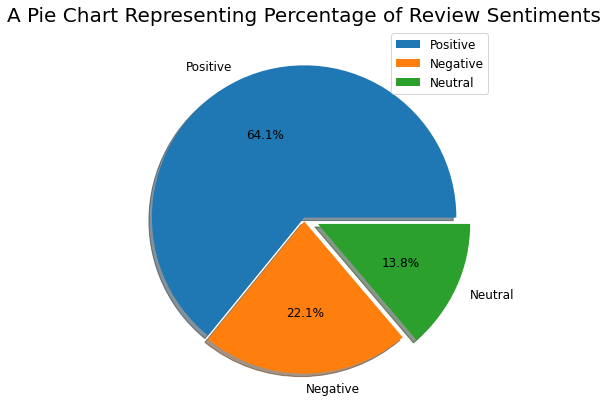

In [ ]:
plt.figure(figsize=(10,7))
slices=df_user_review.Sentiment.value_counts()
labels=['Positive','Negative','Neutral']
explode=[0,0.025,0.1]
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(slices,labels=labels,explode=explode,autopct='%1.1F%%',shadow=True);
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.legend()
plt.show();

### 10.Let's see a more depth understanding of sentiment Polarity and Subjectivity.

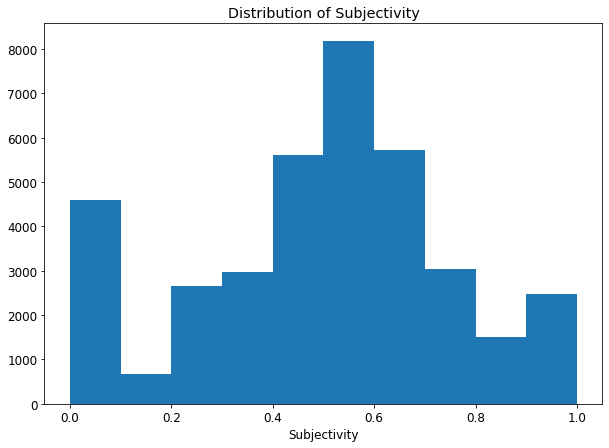

In [ ]:
plt.figure(figsize=(10,7))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(df_user_review.Sentiment_Subjectivity.values)
plt.show();
     

### 11.Does sentiments Polarity is proportional to sentiments subjectivity .

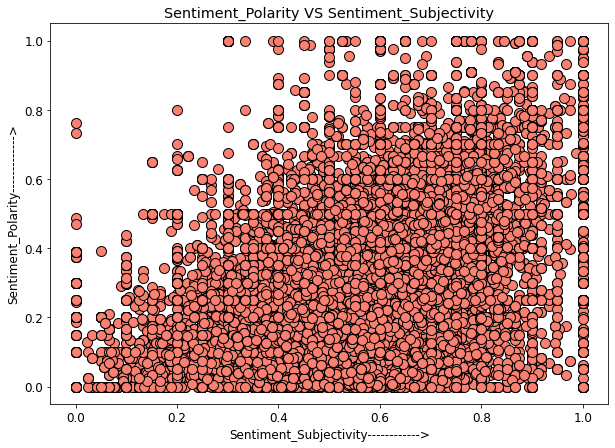

In [ ]:
plt.figure(figsize=(10,7))
y=df_user_review["Sentiment_Polarity"].abs()
x=df_user_review["Sentiment_Subjectivity"].abs()
plt.scatter(x,y,s=100,c="salmon",edgecolor="black")
plt.xlabel("Sentiment_Subjectivity------------>")
plt.ylabel("Sentiment_Polarity------------->")
plt.title("Sentiment_Polarity VS Sentiment_Subjectivity")
plt.show();

# Conculsion

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. This makes the hell lot of competition in App market.

And also we can say that before starting any kind of exploration the data cleaning play a vital role in result and accuracy.
As we all can see the many observations and conclusion that arise from the data visualization and how visualizations make anything interesting with the graphs, plots, chart or maps.

Which simplify the data and can be easily understand the role of the data and their elements in the diverse world of play store.

As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY. The trending of these apps is most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.
Other then this also can be say that mostly the app has higher number of user installs or review gives the app a good rating and mostly all the apps are around the rating of 4 (8000 apps).Also the size and price of the app create a minute difference but not majorly effect the app with good rating, review even if their app size are high. But due to free in charges we get the higher number of user installs and ratings.

Also, it can be seen from the chart that the sentiments play important role  and maximum number of sentiment which are positive around (64.1 %) lies between subjectivity 0.4 to 0.7. From this, we can conclude that the maximum number of the audience give reviews to the applications, according to their experience.
As, we can see that, why exploring data is important before starting to build ML models.

As a conclusion, we learnt that the current trends in the Android market are mostly from these categories which assisting, communicating or entertaining apps.
